In [237]:
# ORGANISATORISCHES
# TEAM: Deket David (Arnold Peter Studium abgebrochen, daher alleiniges Projekt)
# OVERVIEW: Pre-Processing, Data Exploration, Data Visualization
# DATA: country statistics, country latitude and longitude
# ORIGIN: https://perso.telecom-paristech.fr/eagan/class/igr204/datasets
# ORIGIN2: https://github.com/google/dspl/blob/master/samples/google/canonical/countries.csv

In [270]:
import pandas as pd
# Load in data
df = pd.read_csv("factbook.csv", sep=";")

# Drop first row (data types)
df.drop(index=df.index[0], axis=0, inplace=True)
df

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
1,Afghanistan,647500,47.02,NaN,20.75,8000000000,652200000,540000000,446000000,21500000000,...,0,0,29928987,NaN,NaN,NaN,33100,15000,6.75,NaN
2,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,28748,15.08,-504000000,5.12,1410000000,6760000000,5680000000,552400000,17460000000,...,2000,185500000,3563112,NaN,447,1206000000,255000,1100000,2.04,14.80
4,Algeria,2381740,17.13,11900000000,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,...,1200000,11870000000,32531853,37.40,3973,43550000000,2199600,1447310,1.92,25.40
5,American Samoa,199,23.13,NaN,3.33,NaN,120900000,130000000,30000000,500000000,...,0,NaN,57881,NaN,NaN,NaN,15000,2377,3.25,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank,5860,32.37,NaN,3.99,108000000,NaN,NaN,205000000,1800000000,...,NaN,NaN,2385615,NaN,NaN,NaN,301600,480000,4.40,27.20
260,Western Sahara,266000,NaN,NaN,NaN,NaN,83700000,90000000,NaN,NaN,...,0,NaN,273008,NaN,NaN,NaN,NaN,0,NaN,NaN
261,Yemen,527970,43.07,369900000,8.53,5400000000,2827000000,3040000000,4468000000,16250000000,...,417500,4000000000,20727063,46.40,NaN,5300000000,542200,411100,6.67,35.00
262,Zambia,752614,41.38,-181400000,20.23,5353000000,5345000000,8167000000,1548000000,9409000000,...,0,NaN,11261795,127.50,2173,345000000,88400,241000,5.47,50.00


The data points include information about the country's area, birth rate, current account balance, death rate, debt, electricity consumption and production, exports, GDP, GDP per capita, GDP growth rate, HIV/AIDS statistics, highways, imports, industrial production growth rate, infant mortality rate, inflation rate, internet usage, investment, labor force, life expectancy, military expenditures, natural gas statistics, oil statistics, population, public debt, railways, reserves of foreign exchange and gold, telephones in use, total fertility rate and unemployment rate.

# Pre-Processing

In [258]:
# MISSING VALUES
# Get the number of rows before cleaning
rows_before = df.shape[0]

# Removing missing values
df2 = df.dropna()

# Get the number of rows after cleaning
rows_after = df2.shape[0]

# Calculate the number of rows dropped
rows_dropped = rows_before - rows_after

# Print percentage dropped
print(rows_dropped/rows_before*100)

93.15589353612167


In [259]:
# Too many rows are getting dropped
# Print number of empty values per column
missing_values_sum = df.isna().sum()
missing_values_sum

Country                                             0
Area(sq km)                                         0
Birth rate(births/1000 population)                 38
Current account balance                           114
Death rate(deaths/1000 population)                 38
Debt - external                                    62
Electricity - consumption(kWh)                     48
Electricity - production(kWh)                      50
Exports                                            39
GDP                                                33
GDP - per capita                                   33
GDP - real growth rate(%)                          51
HIV/AIDS - adult prevalence rate(%)                95
HIV/AIDS - deaths                                 115
HIV/AIDS - people living with HIV/AIDS             99
Highways(km)                                       33
Imports                                            39
Industrial production growth rate(%)               99
Infant mortality rate(deaths

In [271]:
# Drop all columns with missing value sum > 80
mask = missing_values_sum > 80
df = df.drop(missing_values_sum[mask].index, axis=1)
df

,Country,Area(sq km),Birth rate(births/1000 population),Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,GDP - per capita,...,Internet users,Labor force,Life expectancy at birth(years),Oil - consumption(bbl/day),Oil - production(bbl/day),Population,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
1,Afghanistan,647500,47.02,20.75,8000000000,652200000,540000000,446000000,21500000000,800,...,1000,11800000,42.90,3500,0,29928987,33100,15000,6.75,NaN
2,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,28748,15.08,5.12,1410000000,6760000000,5680000000,552400000,17460000000,4900,...,30000,1090000,77.24,7500,2000,3563112,255000,1100000,2.04,14.80
4,Algeria,2381740,17.13,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,6600,...,500000,9910000,73.00,209000,1200000,32531853,2199600,1447310,1.92,25.40
5,American Samoa,199,23.13,3.33,NaN,120900000,130000000,30000000,500000000,8000,...,NaN,14000,75.84,3800,0,57881,15000,2377,3.25,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank,5860,32.37,3.99,108000000,NaN,NaN,205000000,1800000000,800,...,145000,364000,73.08,NaN,NaN,2385615,301600,480000,4.40,27.20
260,Western Sahara,266000,NaN,NaN,NaN,83700000,90000000,NaN,NaN,NaN,...,NaN,12000,NaN,1800,0,273008,NaN,0,NaN,NaN
261,Yemen,527970,43.07,8.53,5400000000,2827000000,3040000000,4468000000,16250000000,800,...,100000,5980000,61.75,78000,417500,20727063,542200,411100,6.67,35.00
262,Zambia,752614,41.38,20.23,5353000000,5345000000,8167000000,1548000000,9409000000,900,...,68200,4630000,39.70,11000,0,11261795,88400,241000,5.47,50.00


In [277]:
# Impute missing values
# Get column data type, change to numeric dtype
print(df.dtypes)
print(df.columns)
# All numeric, but country column, convert to numeric
columns_to_convert = ['Area(sq km)', 'Birth rate(births/1000 population)',
                      'Death rate(deaths/1000 population)', 'Debt - external',
                      'Electricity - consumption(kWh)', 'Electricity - production(kWh)',
                      'Exports', 'GDP', 'GDP - per capita', 'GDP - real growth rate(%)',
                      'Highways(km)', 'Imports',
                      'Infant mortality rate(deaths/1000 live births)',
                      'Inflation rate (consumer prices)(%)', 'Internet hosts',
                      'Internet users', 'Labor force', 'Life expectancy at birth(years)',
                      'Oil - consumption(bbl/day)', 'Oil - production(bbl/day)', 'Population',
                      'Telephones - main lines in use', 'Telephones - mobile cellular',
                      'Total fertility rate(children born/woman)', 'Unemployment rate(%)']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

print(df.dtypes)

Country                                            object
Area(sq km)                                       float64
Birth rate(births/1000 population)                float64
Death rate(deaths/1000 population)                float64
Debt - external                                   float64
Electricity - consumption(kWh)                    float64
Electricity - production(kWh)                     float64
Exports                                           float64
GDP                                               float64
GDP - per capita                                  float64
GDP - real growth rate(%)                         float64
Highways(km)                                      float64
Imports                                           float64
Infant mortality rate(deaths/1000 live births)    float64
Inflation rate (consumer prices)(%)               float64
Internet hosts                                    float64
Internet users                                    float64
Labor force   

In [273]:
from sklearn.impute import SimpleImputer

# create an imputer object with a strategy of mean
imputer = SimpleImputer(strategy='mean')

# fit the imputer on the dataframe
imputer.fit(df[columns_to_convert])

# transform the dataframe and store the result in a new variable
df_imputed = imputer.transform(df[columns_to_convert])
df_imputed = imputer.fit_transform(df_imputed)
df[columns_to_convert] = df_imputed
df.isna().sum()

Country                                           0
Area(sq km)                                       0
Birth rate(births/1000 population)                0
Death rate(deaths/1000 population)                0
Debt - external                                   0
Electricity - consumption(kWh)                    0
Electricity - production(kWh)                     0
Exports                                           0
GDP                                               0
GDP - per capita                                  0
GDP - real growth rate(%)                         0
Highways(km)                                      0
Imports                                           0
Infant mortality rate(deaths/1000 live births)    0
Inflation rate (consumer prices)(%)               0
Internet hosts                                    0
Internet users                                    0
Labor force                                       0
Life expectancy at birth(years)                   0
Oil - consum

# Data Exploration

In [244]:
# Get basic statistical measures
desc = df.describe()
desc

,Area(sq km),Birth rate(births/1000 population),Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,GDP - per capita,GDP - real growth rate(%),...,Internet users,Labor force,Life expectancy at birth(years),Oil - consumption(bbl/day),Oil - production(bbl/day),Population,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
count,2.630000e+02,263.000000,263.000000,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000,263.000000,...,2.630000e+02,2.630000e+02,263.000000,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000,263.000000
mean,5.849875e+05,22.146667,9.374267,6.317084e+10,8.070919e+10,8.849167e+10,4.432637e+10,2.925614e+11,10552.760870,4.777830,...,4.205036e+06,1.471036e+07,67.692578,4.319728e+05,3.710435e+05,2.900494e+07,5.998770e+06,7.331346e+06,2.937778,15.254687
std,1.881416e+06,10.288457,4.594670,3.135712e+11,3.103735e+11,3.333712e+11,1.230962e+11,1.170810e+12,10381.746491,4.742397,...,1.767145e+07,5.832363e+07,11.160989,1.601971e+06,1.068203e+06,1.117970e+08,2.551505e+07,2.863145e+07,1.439592,12.904457
min,0.000000e+00,7.230000,2.300000,0.000000e+00,1.674000e+06,1.800000e+06,9.800000e+04,1.500000e+06,400.000000,-8.200000,...,3.000000e+02,1.500000e+01,33.870000,0.000000e+00,0.000000e+00,4.600000e+01,0.000000e+00,0.000000e+00,0.910000,0.000000
25%,5.130000e+02,13.950000,6.320000,1.325000e+09,7.513000e+08,8.476000e+08,4.133000e+08,3.424000e+09,2300.000000,2.650000,...,3.000000e+04,3.018000e+05,64.745000,1.095000e+04,0.000000e+00,4.255620e+05,3.840000e+04,5.485000e+04,1.800000,7.700000
50%,4.884500e+04,22.146667,8.780000,1.085000e+10,8.908000e+09,1.004000e+10,3.245000e+09,2.621000e+10,7400.000000,4.777830,...,2.500000e+05,3.700000e+06,69.960000,7.100000e+04,5.100000e+03,5.681519e+06,3.718000e+05,5.223000e+05,2.780000,15.000000
75%,3.339475e+05,27.435000,10.330000,6.317084e+10,8.070919e+10,8.849167e+10,4.432637e+10,2.658000e+11,12950.000000,5.550000,...,4.205036e+06,1.471036e+07,75.965000,4.319728e+05,3.710435e+05,2.747301e+07,4.289400e+06,7.286373e+06,3.460000,15.254687
max,1.707520e+07,48.300000,29.360000,4.710000e+12,3.660000e+12,3.839000e+12,1.109000e+12,1.175000e+13,58900.000000,52.300000,...,2.060321e+08,7.608000e+08,83.510000,1.965000e+07,9.021000e+06,1.306314e+09,2.630000e+08,3.146447e+08,6.840000,90.000000


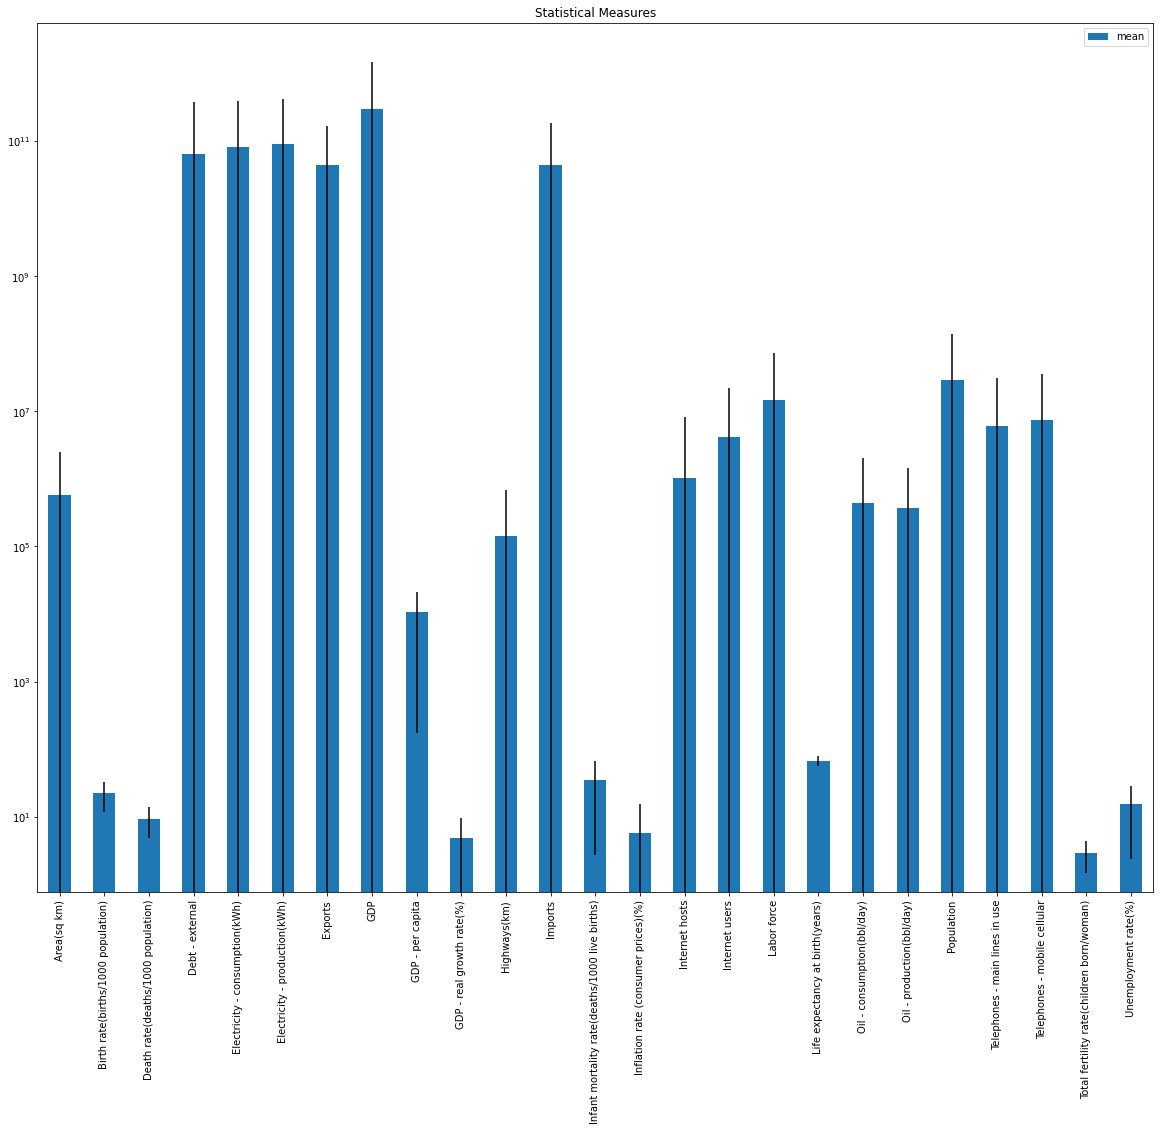

In [245]:
import matplotlib.pyplot as plt
# Visualize distributions of each column, LOG SCALE
# Transpose the describe method to make it easier to plot
desc = desc.T

# Plot the describe method as a bar chart
desc.plot(kind='bar', y='mean', yerr='std', title='Statistical Measures', figsize=(20,16))
plt.yscale('log')
plt.show()

<AxesSubplot:>

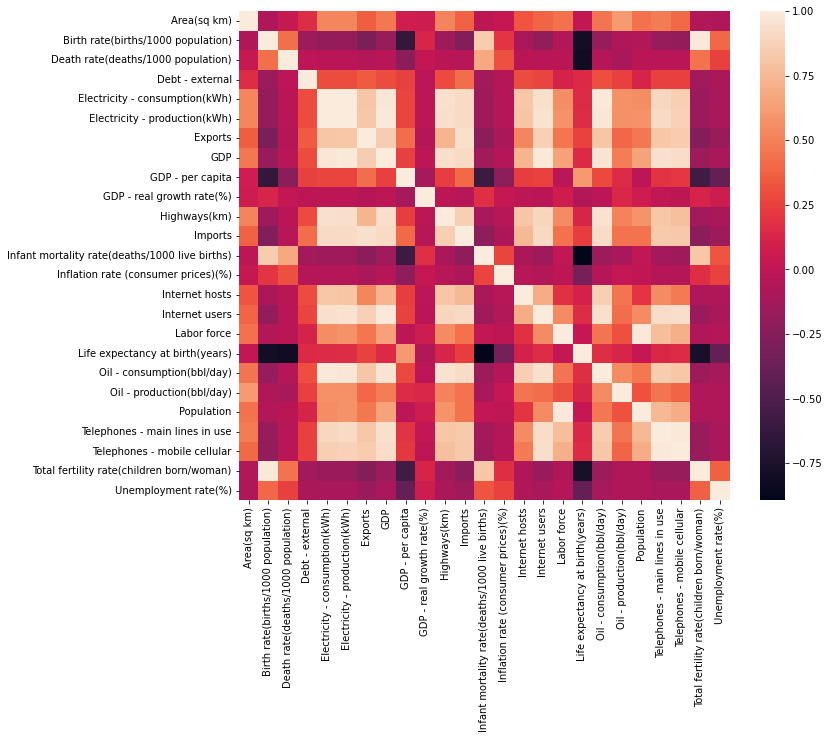

In [246]:
import seaborn as sns
# CORRELATION MATRIX
# Compute corr matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)

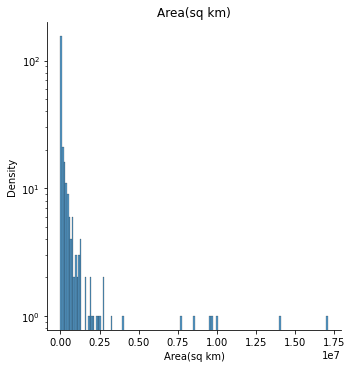

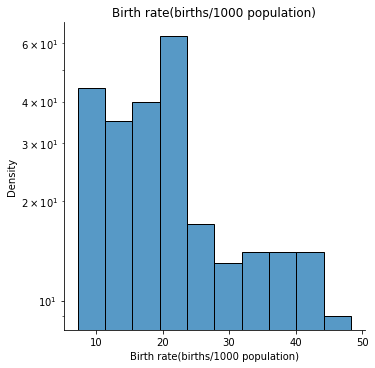

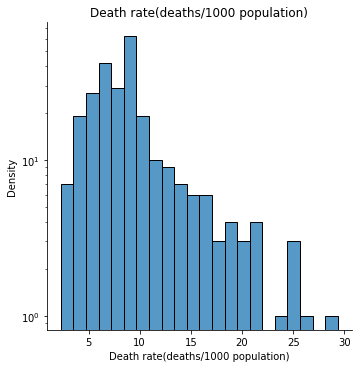

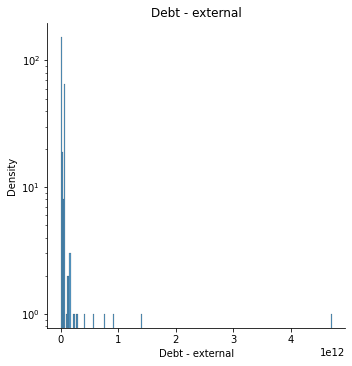

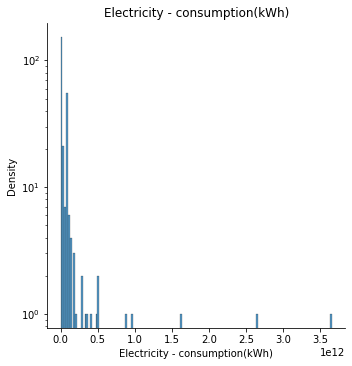

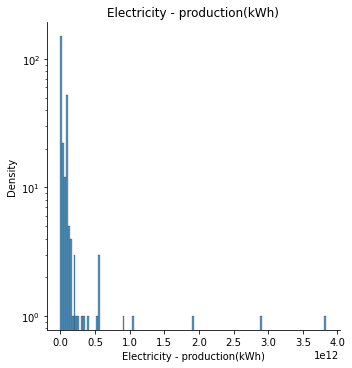

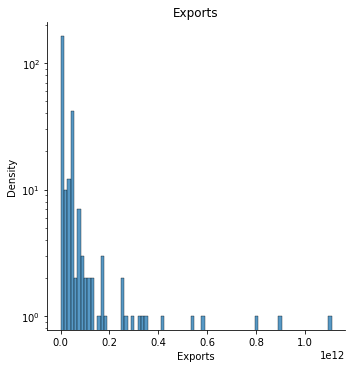

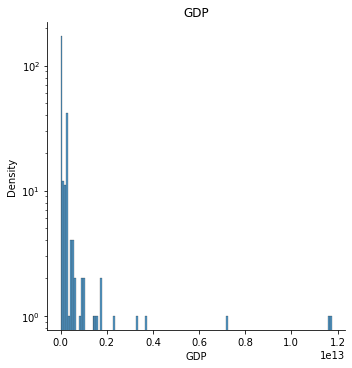

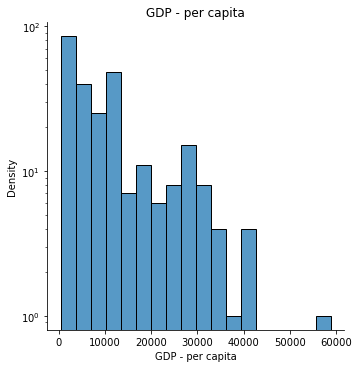

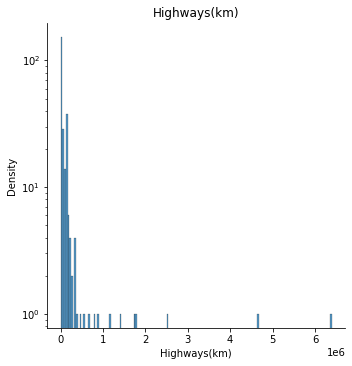

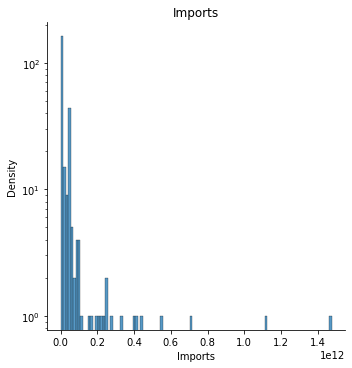

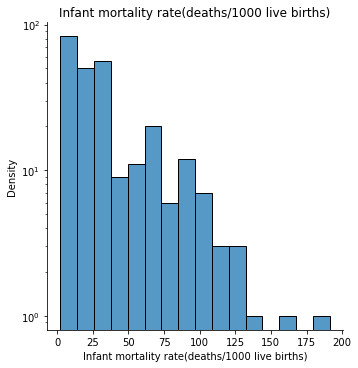

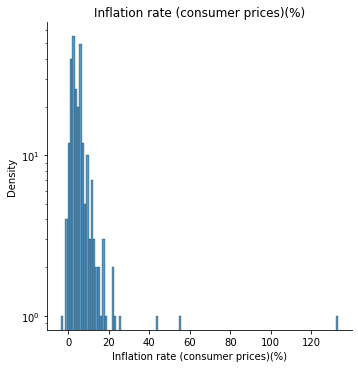

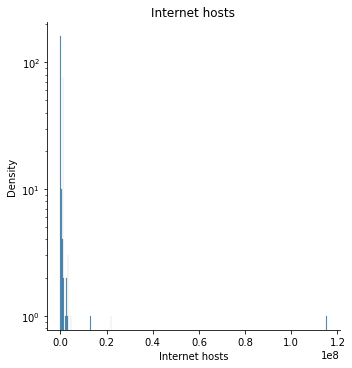

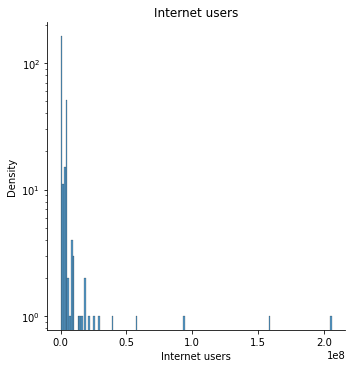

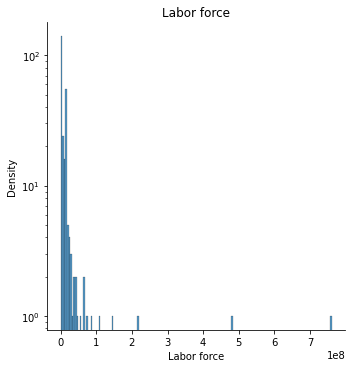

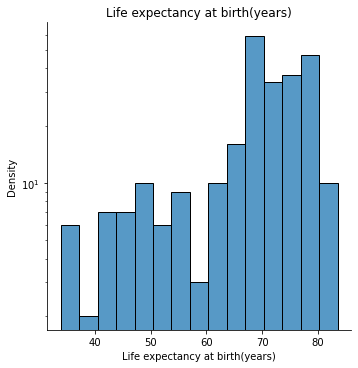

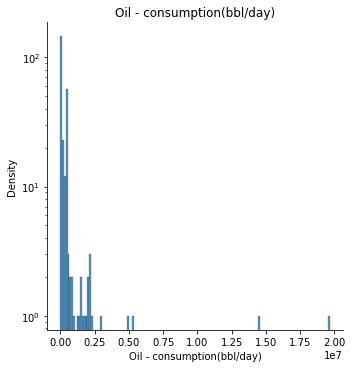

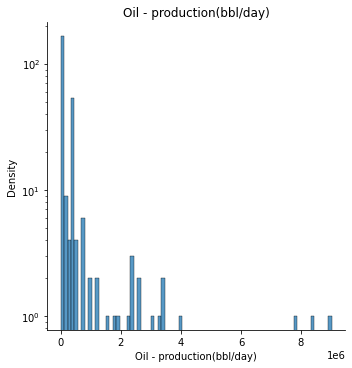

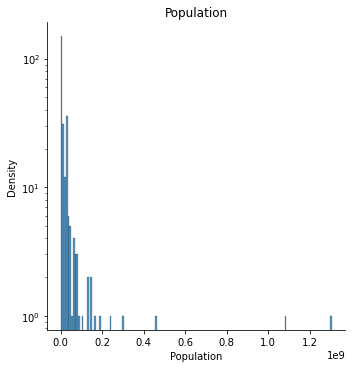

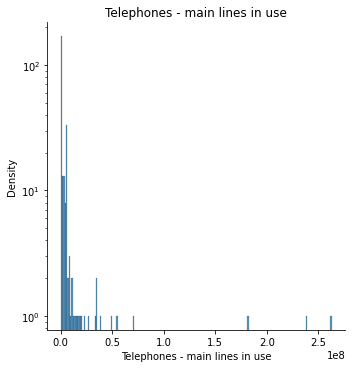

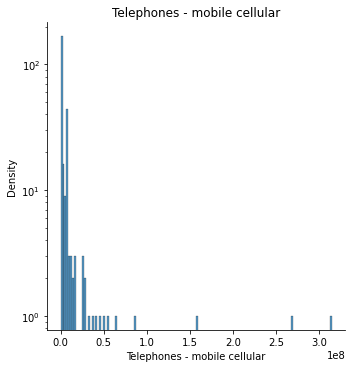

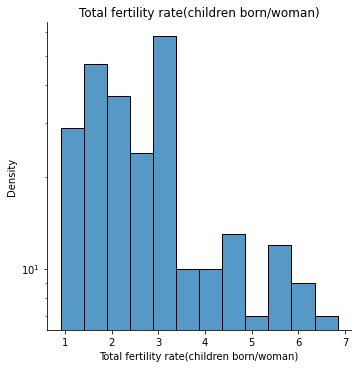

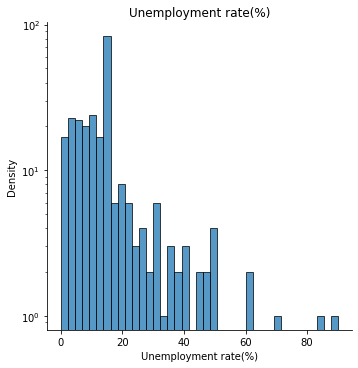

In [247]:
# Get distribution plots
import seaborn as sns

def get_distplot(col):
    x = df[col]
    sns.displot(x)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(col)
    plt.yscale('log')
    plt.show()

for col1 in df.columns:
    if col1 in columns_to_convert and col1 != "GDP - real growth rate(%)":
        get_distplot(col1)

# Visualizations

In [263]:
# Load in country latitude and longitude
location_df = pd.read_csv("latilong.csv")

# Change column names
location_df.rename(columns={"country": "ID", "name": "Country"}, inplace=True)

location_df

,ID,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [264]:
len(df)

263

In [265]:
len(df.columns)

26

In [274]:
# Merge location to current dataframe by country name
df = df.merge(location_df, on="Country", how="inner")
df

,Country,Area(sq km),Birth rate(births/1000 population),Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,GDP - per capita,...,Oil - consumption(bbl/day),Oil - production(bbl/day),Population,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%),ID,latitude,longitude
0,Afghanistan,647500.0,47.020000,20.750000,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,800.00000,...,3500.000000,0.000000e+00,29928987.0,3.310000e+04,15000.0,6.750000,15.254687,AF,33.939110,67.709953
1,Albania,28748.0,15.080000,5.120000,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,4900.00000,...,7500.000000,2.000000e+03,3563112.0,2.550000e+05,1100000.0,2.040000,14.800000,AL,41.153332,20.168331
2,Algeria,2381740.0,17.130000,4.600000,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,6600.00000,...,209000.000000,1.200000e+06,32531853.0,2.199600e+06,1447310.0,1.920000,25.400000,DZ,28.033886,1.659626
3,American Samoa,199.0,23.130000,3.330000,6.317084e+10,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,8000.00000,...,3800.000000,0.000000e+00,57881.0,1.500000e+04,2377.0,3.250000,6.000000,AS,-14.270972,-170.132217
4,Andorra,468.0,9.000000,6.070000,6.317084e+10,8.070919e+10,8.849167e+10,5.800000e+07,1.900000e+09,26800.00000,...,431972.830189,3.710435e+05,70549.0,3.500000e+04,23500.0,1.290000,0.000000,AD,42.546245,1.601554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis and Futuna,274.0,22.146667,9.374267,6.317084e+10,8.070919e+10,8.849167e+10,2.500000e+05,6.000000e+07,3800.00000,...,431972.830189,3.710435e+05,16025.0,1.900000e+03,0.0,2.937778,15.254687,WF,-13.768752,-177.156097
216,Western Sahara,266000.0,22.146667,9.374267,6.317084e+10,8.370000e+07,9.000000e+07,4.432637e+10,2.925614e+11,10552.76087,...,1800.000000,0.000000e+00,273008.0,5.998770e+06,0.0,2.937778,15.254687,EH,24.215527,-12.885834
217,Yemen,527970.0,43.070000,8.530000,5.400000e+09,2.827000e+09,3.040000e+09,4.468000e+09,1.625000e+10,800.00000,...,78000.000000,4.175000e+05,20727063.0,5.422000e+05,411100.0,6.670000,35.000000,YE,15.552727,48.516388
218,Zambia,752614.0,41.380000,20.230000,5.353000e+09,5.345000e+09,8.167000e+09,1.548000e+09,9.409000e+09,900.00000,...,11000.000000,0.000000e+00,11261795.0,8.840000e+04,241000.0,5.470000,50.000000,ZM,-13.133897,27.849332


In [295]:
import plotly.express as px

def create_geoplot(column):
    # Create the plot
    fig = px.scatter_geo(df, lat='latitude', lon='longitude', color=column,
                         hover_name='Country', size=column,
                         title=column, width=800, height=400)
    return fig

In [302]:
figs = []
for col in df.columns:
    if col in columns_to_convert and col != "GDP - real growth rate(%)":
        try:
            figs.append(create_geoplot(col))
        except Exception as e:
            #print(repr(e))
            print("Following column not included " + str(col))

Following column not included Inflation rate (consumer prices)(%)


In [313]:
# Print global visualizations and save images
for index, fig in enumerate(figs):
    fig.show()